Import dataset and setting up. We choose some of the features and get over other that are not appropriate such as full date. We did not make too many classes because the tree was too big or the accuracy was too small.

In [17]:
import pandas as pd
data = pd.read_csv("data.csv")

features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

bins = [0, 2000, 3000, 4000, 8000, 9000]

labels = ['ab', 'ac', 'ad', 'ae', 'af']

df = pd.DataFrame(data=data)

df['cnt'] = pd.cut(df.cnt, bins=bins, labels=labels)

X = df[features].values

y = df.cnt.values

Making kfolds in order to get a picture of how good is the model. 
We also keep the accuracy with the validation data

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=20, shuffle=False, random_state=None)
avg_acc_train = 0.0
avg_acc = 0.0
best_acc = 0.00
best_clf = None
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = DecisionTreeClassifier(max_depth=4)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train, y_pred)
    y_pred = clf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test, y_pred)
    avg_acc_train += acc_train / 20
    avg_acc += acc_test / 20

    if acc_test > best_acc:
        best_clf = clf


We see the accuracy of the model and also plot the tree

0.5555555555555556


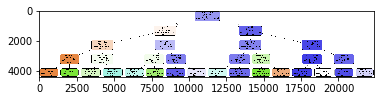

In [20]:
from subprocess import call
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(acc_test)

export_graphviz(best_clf, 'tree.dot', filled=True, rounded=True, special_characters=True, feature_names=features, class_names=labels)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

img=mpimg.imread('tree.png')
imgplot = plt.imshow(img)
plt.show()

